# 6.6 SOURCING & ANALYZING TIME SERIES DATA
** **
**SCRIPT CONTENTS:**

      1) IMPORTING LIBRARIES & FILES
      2) SUBSETTING, WRANGLING, AND CLEANING TIME-SERIES DATA
      3) TIME SERIES ANALYSIS: DECOMPOSITION
      4) TESTING FOR STATIONARITY
      5) STATIONARIZING THE DATA
      5) EXPORTING FILE

## IMPORTING LIBRARIES & FILES
** **

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Document File Location

path = r'C:\Users\G\03-2023 The World Largest Public Companies (Pre-Post Pandemic)'

In [3]:
# Import files

# USA Dataset
usa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Aggregated USA.csv'), index_col = False)

****

In [4]:
# Checking DataFrame Columns (Head)

usa.head(10)

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth
0,2009,United States of America,Aerospace & Defense,238040,210110,12810,127690,8.042847,4.061215,-21.362799,-46.326187
1,2009,United States of America,Banking,513980,9504850,-21010,307770,-27.258060,-0.264113,-131.158238,-66.858700
2,2009,United States of America,Business Services & Supplies,143540,217720,5300,102850,-17.301377,-14.733297,-41.885965,-39.976656
3,2009,United States of America,Capital Goods,195700,206730,13210,82840,-0.553890,3.370169,-14.664083,-61.601928
4,2009,United States of America,Chemicals,215670,210370,15290,153590,18.944408,8.215021,11.850768,-48.890220
5,2009,United States of America,Conglomerates,379800,997780,34100,231040,6.979888,0.530977,-13.032390,-61.434843
6,2009,United States of America,Construction,86940,60410,-2570,28900,-21.321267,-36.383741,-38.072289,-58.590056
7,2009,United States of America,Consumer Durables,665410,664980,-21660,286580,-12.888487,-21.156719,27.787611,-42.286934
8,2009,United States of America,Diversified Financials,500670,5200060,-88320,443790,-31.317219,-32.639878,-299.233025,-54.645887
9,2009,United States of America,Drugs & Biotechnology,539320,538350,48090,633570,8.384244,7.087444,18.975755,-25.166541


In [5]:
# Checking Data dimension

usa.shape

(391, 11)

In [6]:
# Check Column Names

usa.columns

Index(['Year', 'Country', 'Industry', 'Sales', 'Assets', 'Profits',
       'Market Value', 'Sales Growth', 'Assets Growth', 'Profits Growth',
       'Market Value Growth'],
      dtype='object')

In [7]:
# Check dataTypes

usa.dtypes

Year                     int64
Country                 object
Industry                object
Sales                    int64
Assets                   int64
Profits                  int64
Market Value             int64
Sales Growth           float64
Assets Growth          float64
Profits Growth         float64
Market Value Growth    float64
dtype: object

In [8]:
# Convert "Year" column to datetime
usa['Year'] = pd.to_datetime(usa['Year'], format='%Y')

# Check the updated data type
print(usa.dtypes)

Year                   datetime64[ns]
Country                        object
Industry                       object
Sales                           int64
Assets                          int64
Profits                         int64
Market Value                    int64
Sales Growth                  float64
Assets Growth                 float64
Profits Growth                float64
Market Value Growth           float64
dtype: object


In [9]:
# Checking for Missing values

usa.isnull().sum()

Year                   0
Country                0
Industry               0
Sales                  0
Assets                 0
Profits                0
Market Value           0
Sales Growth           0
Assets Growth          0
Profits Growth         0
Market Value Growth    0
dtype: int64

In [10]:
# Checking for Duplicate values

usa_dups = usa[usa.duplicated()]
usa_dups

,Year,Country,Industry,Sales,Assets,Profits,Market Value,Sales Growth,Assets Growth,Profits Growth,Market Value Growth


## SUBSETTING, WRANGLING, AND CLEANING TIME-SERIES DATA
** **

In [11]:
# Create a subsets

usa2 = usa.iloc[:, [0,7]]
usa2

,Year,Sales Growth
0,2009-01-01,8.042847
1,2009-01-01,-27.258060
2,2009-01-01,-17.301377
3,2009-01-01,-0.553890
4,2009-01-01,18.944408
...,...,...
386,2022-01-01,19.357772
387,2022-01-01,-5.087430
388,2022-01-01,35.084849
389,2022-01-01,34.207434


In [12]:
# Grouping by 'Year'

usa2 = usa2.groupby(by = ['Year']).mean()
usa2

,Sales Growth
Year,
2009-01-01,-1.382653
2010-01-01,-9.542852
2011-01-01,5.359332
2012-01-01,11.714129
2013-01-01,6.105802
2014-01-01,4.390165
2015-01-01,4.141983
2016-01-01,-0.748148
2017-01-01,1.839041


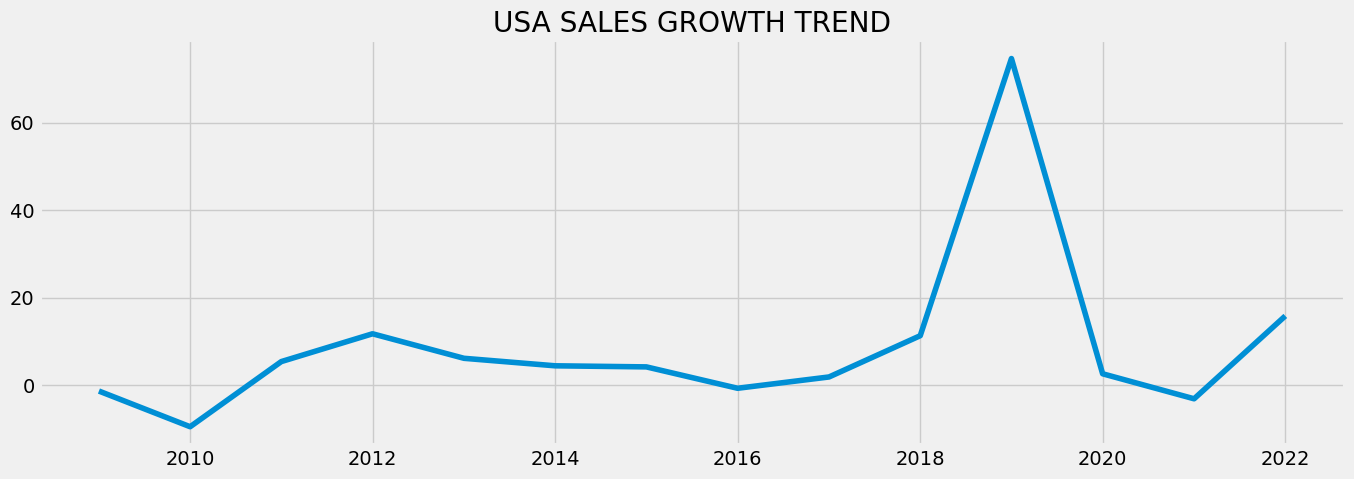

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize = (15,5), dpi = 100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.title('USA SALES GROWTH TREND')
plt.plot(usa2)

## TIME SERIES ANALYSIS: DECOMPOSITION
** **

In [14]:
# Decompose the time series using an additive model

decomposition1 = sm.tsa.seasonal_decompose(usa2, model = 'additive', period = 2)

In [15]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

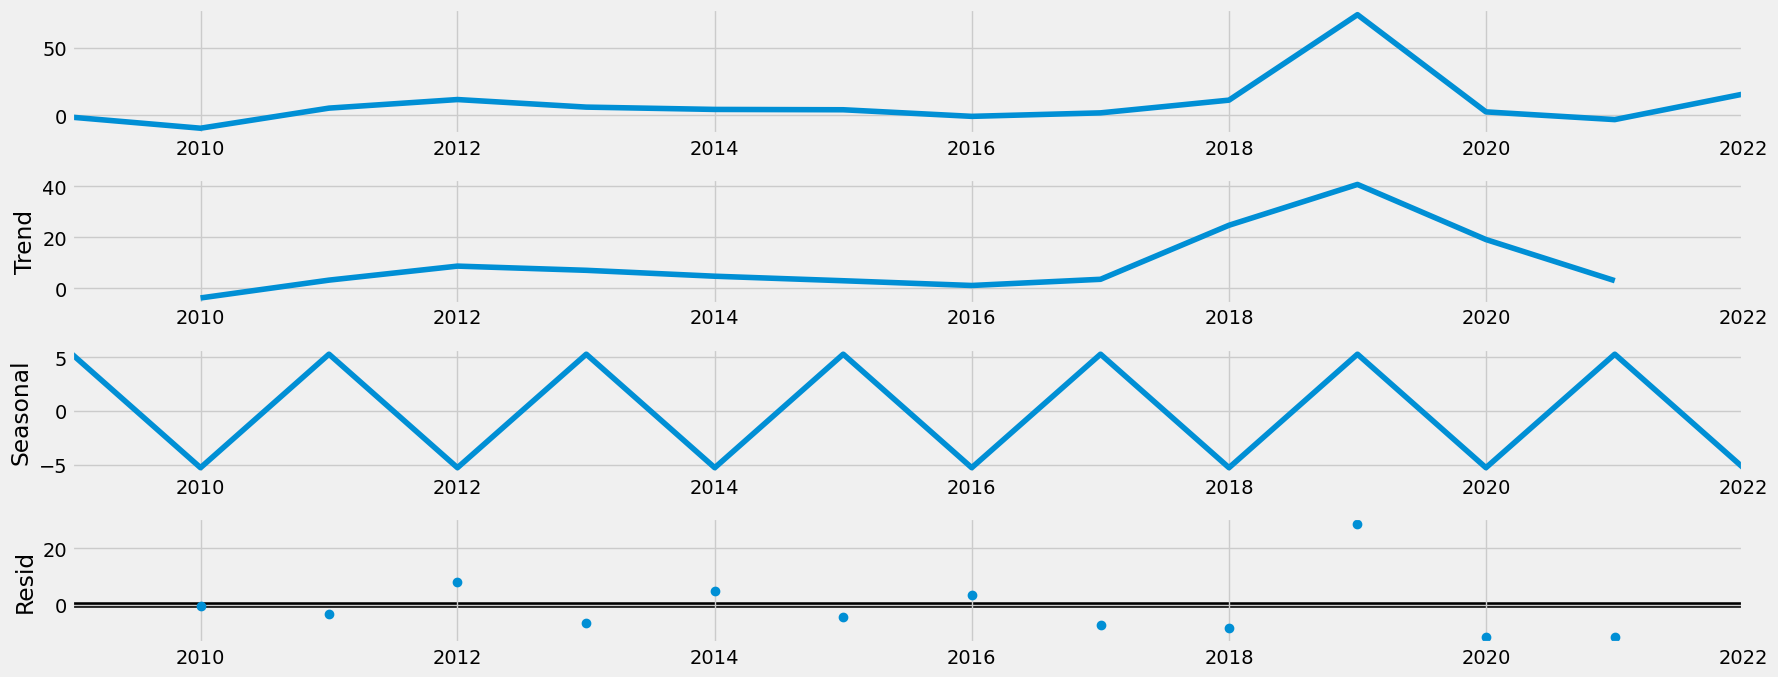

In [16]:
# Plot the separate components

decomposition1.plot()
plt.show()

## TESTING FOR STATIONARITY
** **

In [17]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(usa2['Sales Growth'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.267151
p-value                         0.016412
Number of Lags Used             0.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


**NOTE:** The test statistic (-3.267151) is more negative than the critical values at all three significance levels. This suggests `strong evidence in favor of the data being stationary` and rejects the idea that it is non-stationary.

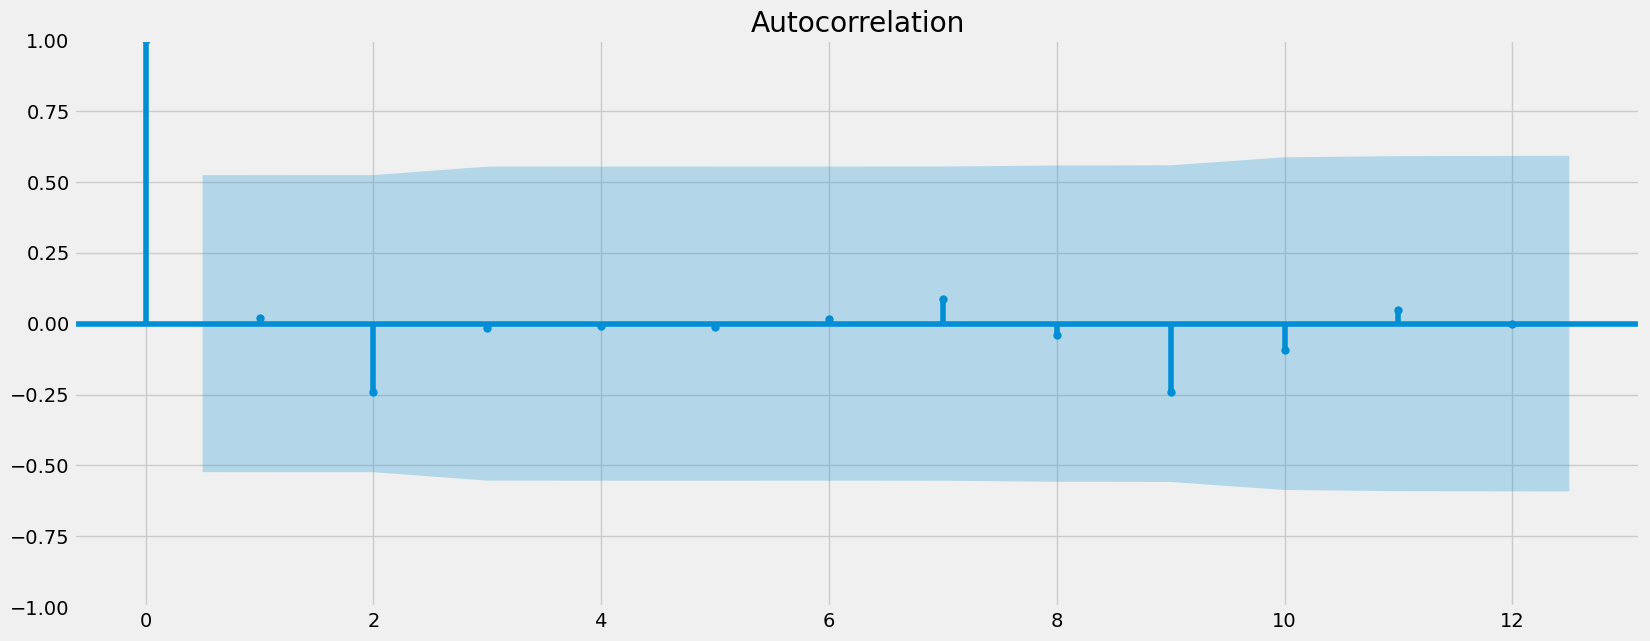

In [18]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(usa2)
plt.show()

## STATIONARIZING THE DATASETS
** **

In [19]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

usa_diff = usa2 - usa2.shift(1) 
usa_diff

,Sales Growth
Year,
2009-01-01,NaN
2010-01-01,-8.160199
2011-01-01,14.902183
2012-01-01,6.354797
2013-01-01,-5.608327
2014-01-01,-1.715636
2015-01-01,-0.248183
2016-01-01,-4.890131
2017-01-01,2.587188


In [20]:
# Remove the missing values that came about as a result of the differencing. 

usa_diff.dropna(inplace = True) 
usa_diff

,Sales Growth
Year,
2010-01-01,-8.160199
2011-01-01,14.902183
2012-01-01,6.354797
2013-01-01,-5.608327
2014-01-01,-1.715636
2015-01-01,-0.248183
2016-01-01,-4.890131
2017-01-01,2.587188
2018-01-01,9.437908


In [21]:
# Check Column Names for all dataframes 

usa_diff.columns

Index(['Sales Growth'], dtype='object')

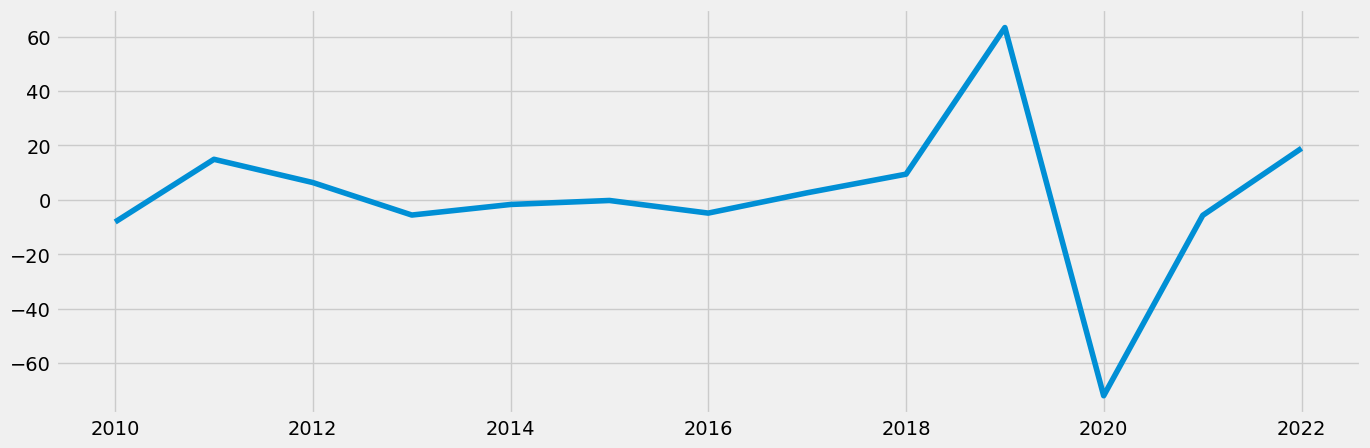

In [22]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize = (15,5), dpi=100)
plt.plot(usa_diff)

In [23]:
dickey_fuller(usa_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.955808
p-value                         0.039233
Number of Lags Used             2.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


**NOTE:** Similar to the previous results, it suggests that the data shows some evidence in favor of stationarity although it is not as strong as in the previous test. We can still reject the null hypothesis of non-stationarity based on the test statistic and the p-value (-2.955808). It's worth noting that the evidence for stationarity is relatively weaker compared to a more extreme test statistic or a smaller p-value.

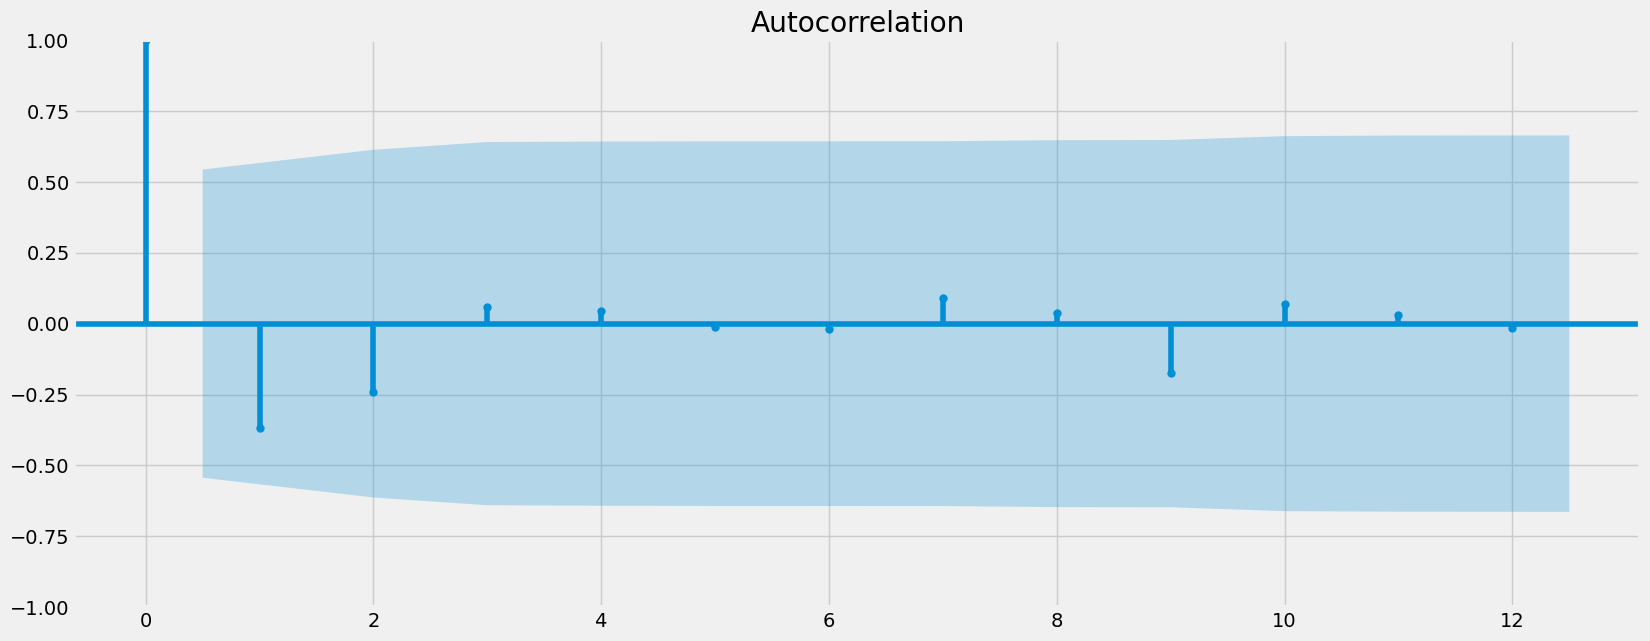

In [24]:
plot_acf(usa_diff)
plt.show()

## EXPORTING FILE
** **

In [25]:
# DIFFEREENCED USA SALES

usa_diff.to_csv(os.path.join(path, '02 Data','Prepared Data', 'USA Differenced Sales.csv'))